# Prosper Loan Data Exploration
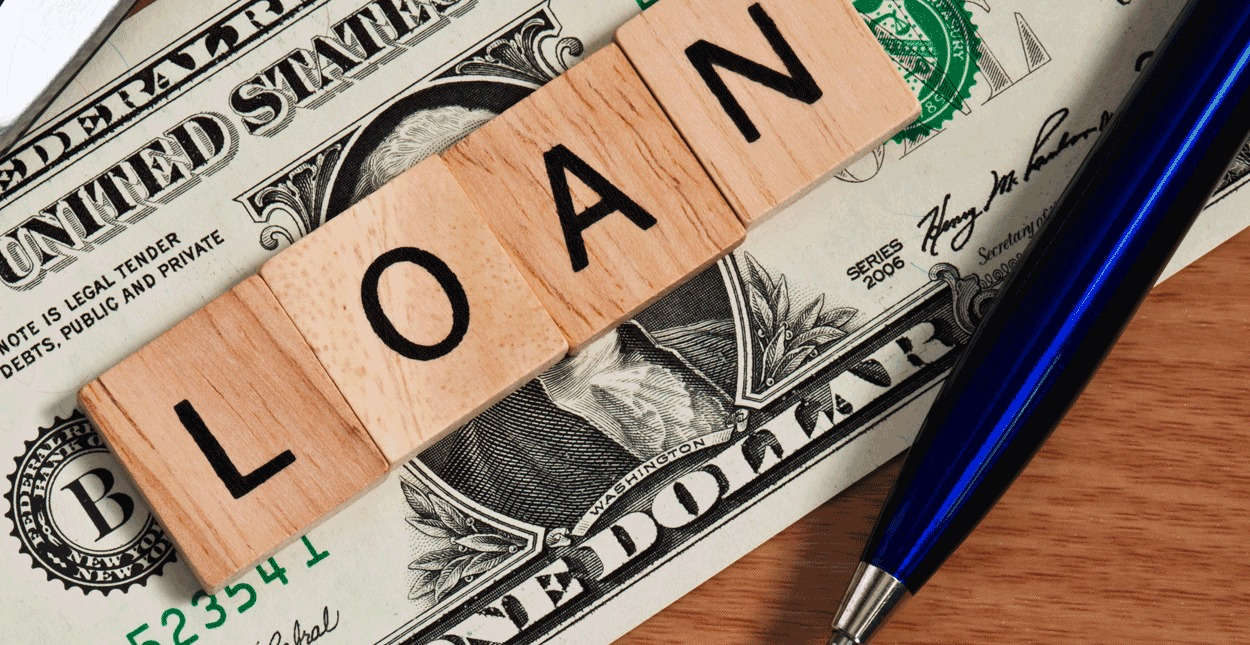

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
# load in the dataset into a pandas dataframe, print statistics
df_loan = pd.read_csv('prosperLoanData.csv')

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [6]:
# filter out loans without ProsperScores
df_loan = df_loan[df_loan['ProsperScore'].isnull()==False]

In [7]:
# remove columns with empty values that are not useful in the Dateset
df_loan.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

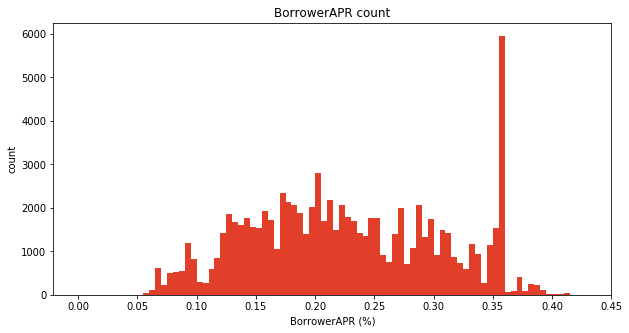

In [8]:
# see the counts for all BorrowerAPR values
plt.figure(figsize=(10,5))
colors = ["#E13F29"]
bins = np.arange(0, df_loan['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins,color=colors)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan['BorrowerAPR'].max()+0.05, 0.05));

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

Text(0, 0.5, 'ProsperScore')

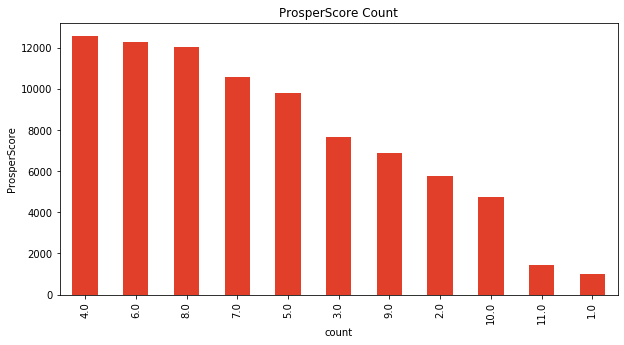

In [9]:
# see which ProsperScore borrowers received the most
plt.figure(figsize=(10,5))
df_loan['ProsperScore'].value_counts().plot(kind='bar',color=colors)
plt.title('ProsperScore Count')
plt.xlabel('count')
plt.ylabel('ProsperScore')

ProsperScore Count: Seems most borrower are given with low score. The lower the score, the higher borrower counts it has.

## Exploring the data: loan characteristics 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

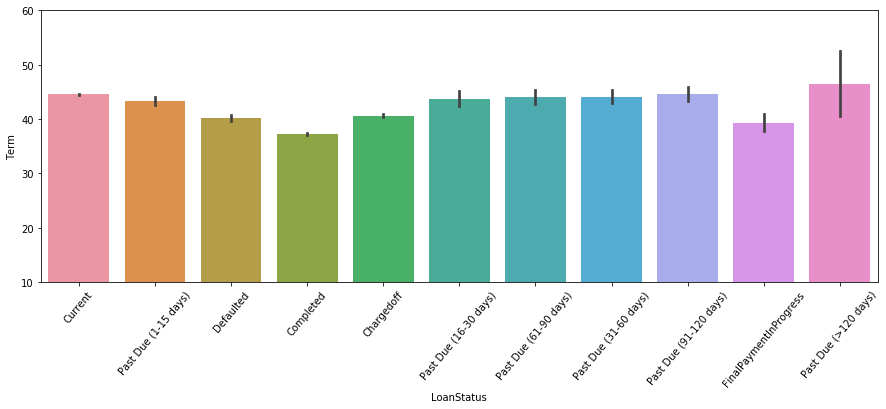

In [10]:
plt.figure(figsize=(15,5))
sb.barplot(x="LoanStatus", y="Term", data=df_loan).set_ylim([10, 60])
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

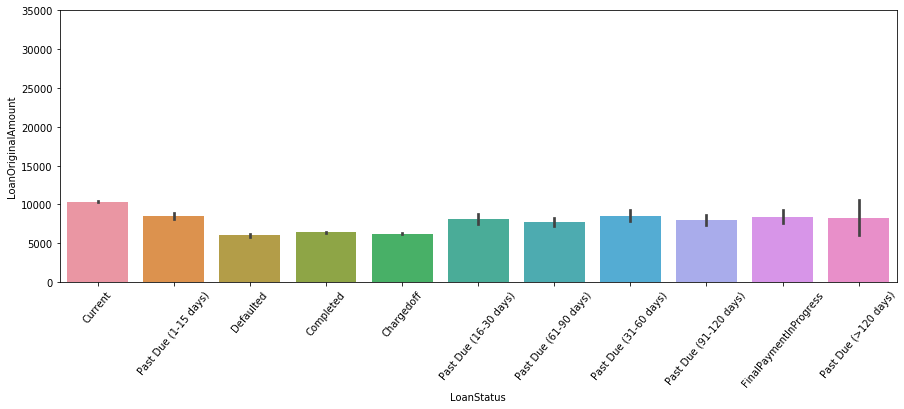

In [11]:
plt.figure(figsize=(15,5))
sb.barplot(x="LoanStatus", y="LoanOriginalAmount", data=df_loan).set_ylim([0,35000])
plt.xticks(rotation=50)

# Bivariate Exploration

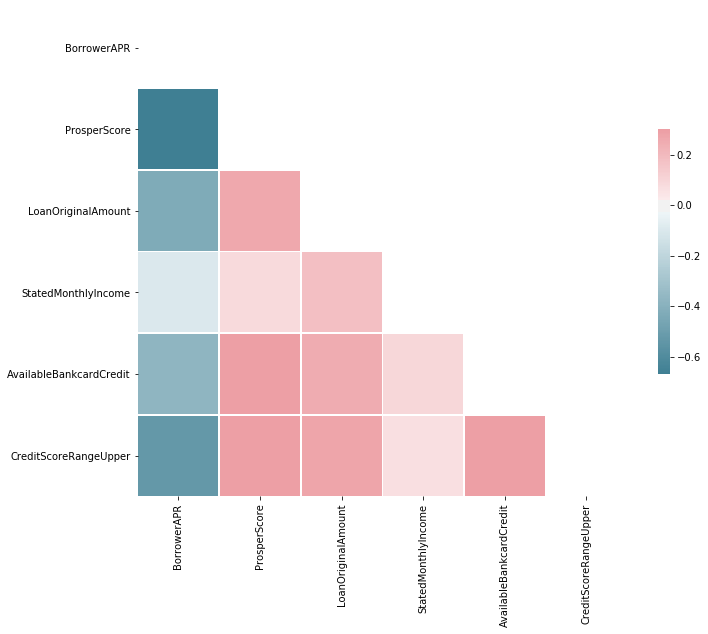

In [12]:
# Compute the correlation matrix
d = ['BorrowerAPR', 'ProsperScore', 'LoanOriginalAmount', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']
corr = df_loan[d].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

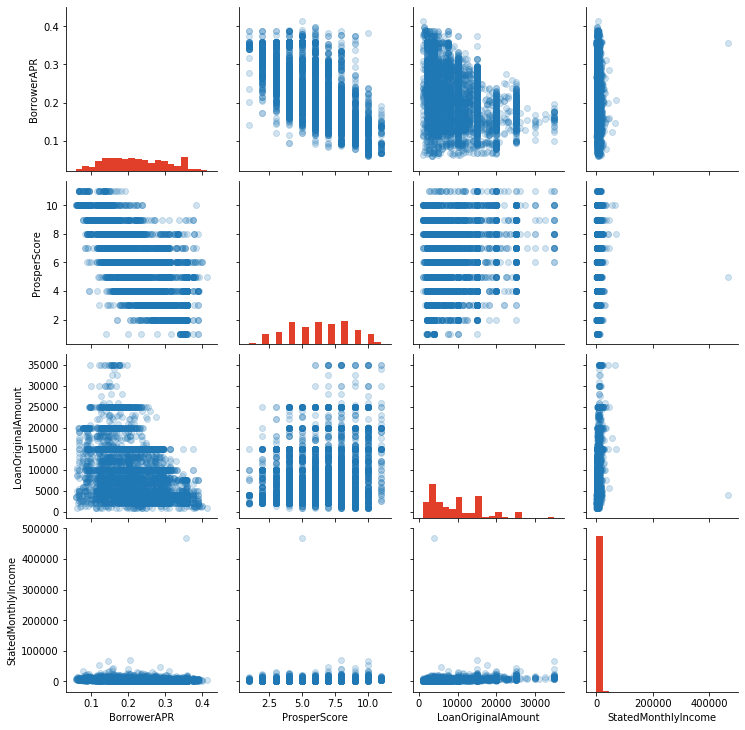

In [13]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
d = ['BorrowerAPR', 'ProsperScore', 'LoanOriginalAmount', 
            'StatedMonthlyIncome']
df_loan_samp = df_loan.sample(5000)
g = sb.PairGrid(data = df_loan_samp.dropna(), vars = d)
g = g.map_diag(plt.hist,color=colors, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

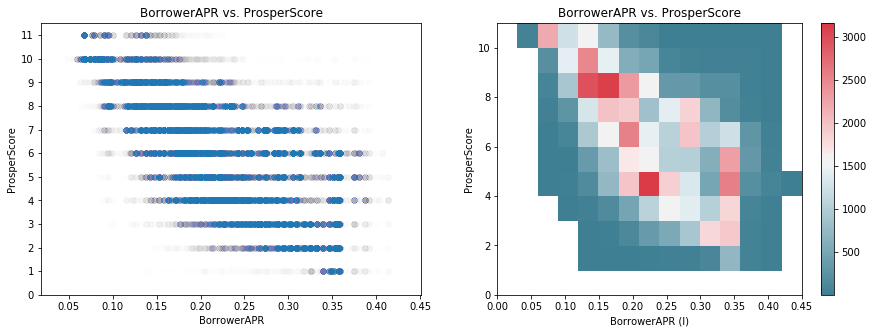

In [14]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan['ProsperScore'].max()+1, 1)
# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)
plt.hist2d(data = df_loan, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = cmap, cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

BorrowerAPR vs. ProsperScore: This make sense becasue people with higher rating tend to be more reliable and therefore given lower BorrowerAPR

C:\Users\divya\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

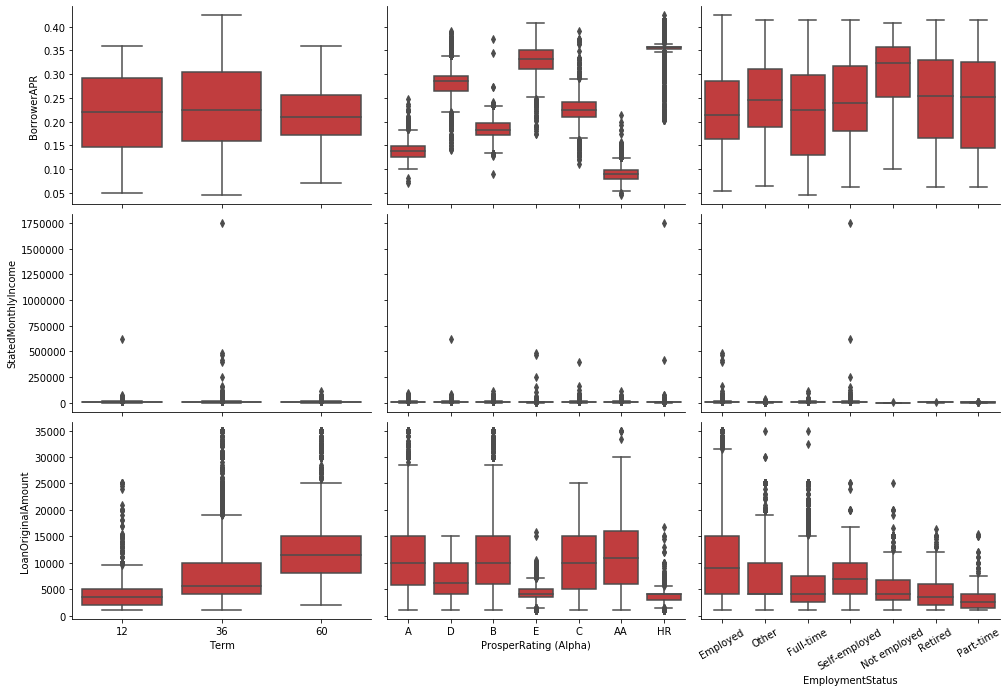

In [15]:
# plot matrix of numeric features against categorical features.
cvars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[3]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cvars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that the loan amount is increased with the increase of loan term. The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

# Multivariate Exploration

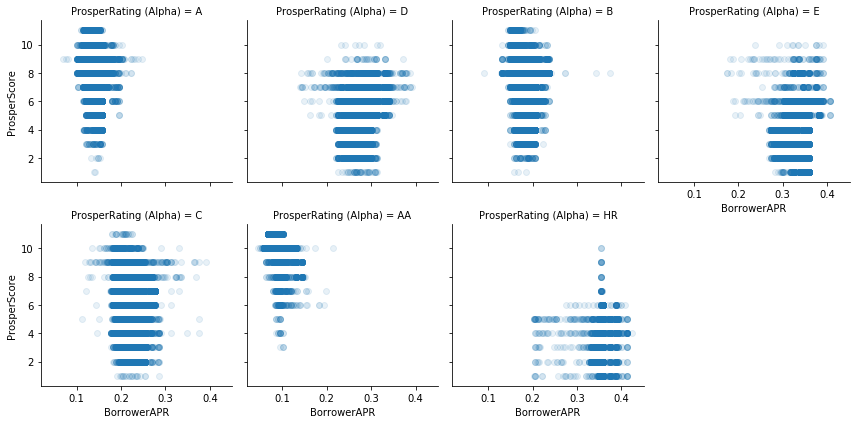

In [16]:
g = sb.FacetGrid(data = df_loan, col = 'ProsperRating (Alpha)', col_wrap = 4, height= 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore');

This visualization helps to analyze BorrowerAPR vs ProsperScore on difference letter ratings. The patterns shows the lowerest rating(HR) of borrowers have the highest APR. For high rating A(A), the borrowers has the lowers APR. This visualization differenate groups of people in terms of APR received based on their rating and scores.

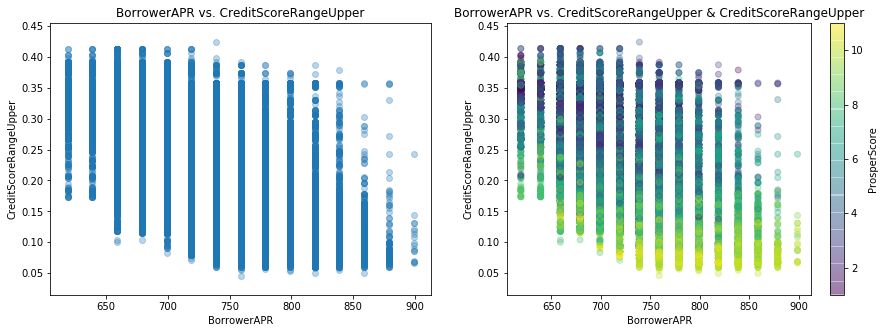

In [17]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = df_loan, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore: Since CreditScoreRangeUpper and ProsperScore are positive correlated to borrowerAPR, this visualization helps to see the effects on BorrowerAPR again. We can see the CreditScoreRangeUpper increase as BorrowerAPR decrease in the plots. By adding ProsperScore to color encodings, BorrowerAPR decreases as ProsperScore increases. This proves the point that CreditScoreRangeUpper and ProsperScore negatively correlated to BorrowerAPR.

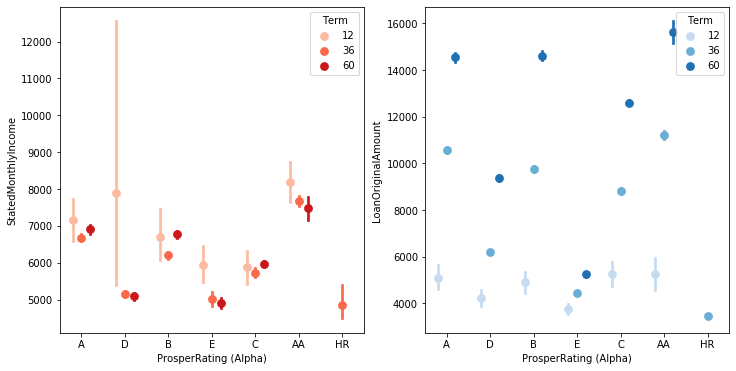

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Reds', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1]);

For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The correlation and matrix plots in previous plots can also be counted as part of Multivariate Exploration. To be more efficient, these two plots can be done ealier part of exploration to preview all variables and how they interact to each other. Adding to that, FacetGrid shows how each rating groups differ in terms of BorrowerAPR vs ProsperScore.

From all above visualizations created from univariate exploration to multivariate exploration, many variable are found to be negatively correlated to BorrowerAPR, whereas ProspoerScore gives the strongest negative relationship.

Looking further into loan performance, I found that most defaulting loans, have paid higher interest rates and received worse credit ratings than performing loans. However, there are many cases where defaulting loans have either paid relatively low interest, received very good credit ratings or both. This clearly is a weakness of the Prosper Platform, since it fails to compensate investors who bear a higher risks with adequate interest in a quite a lot of cases.

Moreover, I found that ProsperScore is a good measure to predict loan performance and actual returns. Especially the most important and intended low-risk ProsperScores 8 and 9 have lower default rates compared to worse Prosper scores. However, it is also the case that the difference in default rate between the most important ProsperScores 5 to 9 are not really significant. Moreover, Prosper was not able to significantly decrease the share of non-performing loans over the past years.

Finally, I found that specific jobs, states and loan duration have an influence on loan performance and actual returns.